In [1]:
import scipy.io as scio  # 用于加载mat文件的包
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model,model_selection,svm


In [5]:
data = scio.loadmat('data1.mat')

X = data['X']
y = data['y']


print(X)
print(y)



[[1.9643   4.5957  ]
 [2.2753   3.8589  ]
 [2.9781   4.5651  ]
 [2.932    3.5519  ]
 [3.5772   2.856   ]
 [4.015    3.1937  ]
 [3.3814   3.4291  ]
 [3.9113   4.1761  ]
 [2.7822   4.0431  ]
 [2.5518   4.6162  ]
 [3.3698   3.9101  ]
 [3.1048   3.0709  ]
 [1.9182   4.0534  ]
 [2.2638   4.3706  ]
 [2.6555   3.5008  ]
 [3.1855   4.2888  ]
 [3.6579   3.8692  ]
 [3.9113   3.4291  ]
 [3.6002   3.1221  ]
 [3.0357   3.3165  ]
 [1.5841   3.3575  ]
 [2.0103   3.2039  ]
 [1.9527   2.7843  ]
 [2.2753   2.7127  ]
 [2.3099   2.9584  ]
 [2.8283   2.6309  ]
 [3.0473   2.2931  ]
 [2.4827   2.0373  ]
 [2.5057   2.3853  ]
 [1.8721   2.0577  ]
 [2.0103   2.3546  ]
 [1.2269   2.3239  ]
 [1.8951   2.9174  ]
 [1.561    3.0709  ]
 [1.5495   2.6923  ]
 [1.6878   2.4057  ]
 [1.4919   2.0271  ]
 [0.962    2.682   ]
 [1.1693   2.9276  ]
 [0.8122   2.9992  ]
 [0.9735   3.3881  ]
 [1.25     3.1937  ]
 [1.3191   3.5109  ]
 [2.2292   2.201   ]
 [2.4482   2.6411  ]
 [2.7938   1.9656  ]
 [2.091    1.6177  ]
 [2.5403   2.

[[6 5]
 [5 4]
 [3 1]]
[-1, 1, 1]
w：[[ 0.28171061 -0.46802748]]，b：[0.49618533]
0.2817106073803349
-0.4680274800137342
0.4961853305335523


ValueError: Masked arrays must be 1-D

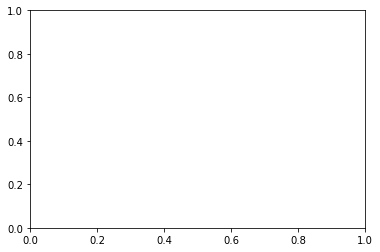

In [8]:
X = np.mat([[6,5],[5,4],[3,1]])
y = [-1,1,1]


print(X)
print(y)

cls = svm.LinearSVC()

cls.fit(X,y)

print('w：%s，b：%s'%(cls.coef_,cls.intercept_))


w =cls.coef_[0]
b = cls.intercept_[0]

print(w[0])
print(w[1])
print(b)


In [3]:
# 划分数据集
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

# print(X_train)
# print(y_train)


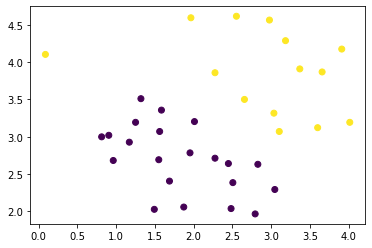

In [4]:
# 对训练数据进行可视化

# 表示的是色彩或颜色序列，可选，默认蓝色’b’。但是c不应该是一个单一的RGB数字，也不应该是一个RGBA的序列，因为不便区分。c可以是一个RGB或RGBA二维行数组。
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [5]:
# # 测试数据集上的可视化
# plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

In [6]:
# SVM训练过程
cls = svm.LinearSVC()

# cls.fit(X_train,y_train)
# 因为fit()第二个参数（也就是label）必须是(n.)格式的，而传入的是(n,1)格式的，所以我们需要将他转换
cls.fit(X_train,y_train.ravel())

print('w：%s，b：%s'%(cls.coef_,cls.intercept_))

print('算法评分：%.2f'%cls.score(X_test,y_test))

w =cls.coef_[0]
b = cls.intercept_[0]

print(w[0])
print(w[1])
print(b)


w：[[0.36162156 0.67299296]]，b：[-3.10320791]
算法评分：1.00
0.3616215573678244
0.6729929586868726
-3.103207906223657


In [7]:
# 会发现有个点有问题，加入惩罚项C的svm训练

# Sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’,fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
# 查官方文档。

# cls = svm.LinearSVC(C=10**9,max_iter=10000000)
# cls.fit(X_train,y_train.ravel())

# print('w：%s，b：%s'%(cls.coef_,cls.intercept_))

# print('算法评分：%.2f'%cls.score(X_test,y_test))
# w =cls.coef_[0]
# b = cls.intercept_[0]


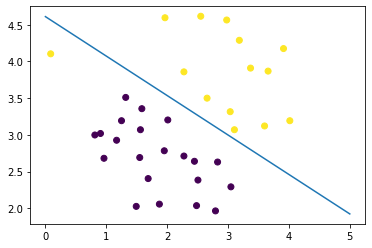

In [8]:
# 画出决策边界和训练样本集合上的点
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

# 决策边界是w1x+w2y+b=0的形式，需要改写以下。y=。。。
x = np.linspace(0,5,10)
y = (-w[0]*x - b)/w[1]


plt.plot(x, y)


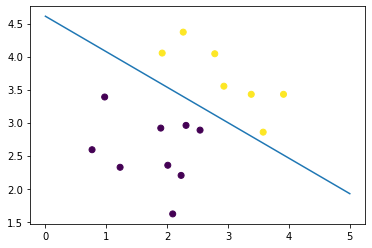

In [9]:
# 画出决策边界和测试样本集上的点
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
x = np.linspace(0,5,10)
y = (-w[0]*x - b)/w[1]
plt.plot(x, y)

